In [1]:
# Download Bitcoin historical data from 
# https://coincodex.com/crypto/bitcoin/historical-data/

In [2]:
# Import with pandas 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from datetime import datetime
import tensorflow as tf

# Parse dates and set date column to index

df = pd.read_csv("bitcoin_2010-07-17_2024-05-03.csv",
                 parse_dates=["Date"], 
                 index_col=["Date"],
                 dayfirst=True) # parseing dates
df = df[::-1] # we reverse dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5039 entries, 2010-07-18 to 2024-05-03
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        5039 non-null   float64
 1   High        5039 non-null   float64
 2   Low         5039 non-null   float64
 3   Close       5039 non-null   float64
 4   Volume      5039 non-null   float64
 5   Market Cap  5039 non-null   float64
dtypes: float64(6)
memory usage: 275.6 KB


In [3]:
df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2024-04-29,63519.98,64300.03,62875.28,63059.25,1.239440e+11,1.254090e+12
2024-04-30,63144.46,64070.04,61835.95,63817.97,1.288920e+11,1.235750e+12
2024-05-01,63760.26,64654.02,59265.11,60761.95,1.432570e+11,1.217180e+12
2024-05-02,60697.08,60762.08,56721.02,58266.04,1.589880e+11,1.148610e+12
2024-05-03,58601.49,59545.21,57003.30,59134.50,1.313380e+11,1.149460e+12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5039 entries, 2010-07-18 to 2024-05-03
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        5039 non-null   float64
 1   High        5039 non-null   float64
 2   Low         5039 non-null   float64
 3   Close       5039 non-null   float64
 4   Volume      5039 non-null   float64
 5   Market Cap  5039 non-null   float64
dtypes: float64(6)
memory usage: 275.6 KB


In [5]:
len(df)

5039

In [6]:
# Only want closing price for each day, to make it easy to process ie. 
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2010-07-18,0.0500
2010-07-19,0.0858
2010-07-20,0.0808
2010-07-21,0.0747
2010-07-22,0.0792


In [7]:
bitcoin_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5039 entries, 2010-07-18 to 2024-05-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5039 non-null   float64
dtypes: float64(1)
memory usage: 78.7 KB


In [8]:
# Formatting historical Bitcoin data with Python
reversed_timesteps = []
reversed_btc_price = []
with open("bitcoin_2010-07-17_2024-05-03.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    reversed_timesteps.append(datetime.strptime(line[0], "%d-%m-%Y")) # get the dates as dates (not strings), strptime = string parse time
    reversed_btc_price.append(float(line[4])) # get the closing price as float

timesteps = reversed_timesteps[::-1] # we reverse dataframe # we reverse dataframe
btc_price = reversed_btc_price[::-1] # we reverse dataframe
# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2010, 7, 18, 0, 0),
  datetime.datetime(2010, 7, 19, 0, 0),
  datetime.datetime(2010, 7, 20, 0, 0),
  datetime.datetime(2010, 7, 21, 0, 0),
  datetime.datetime(2010, 7, 22, 0, 0),
  datetime.datetime(2010, 7, 23, 0, 0),
  datetime.datetime(2010, 7, 24, 0, 0),
  datetime.datetime(2010, 7, 25, 0, 0),
  datetime.datetime(2010, 7, 26, 0, 0),
  datetime.datetime(2010, 7, 27, 0, 0)],
 [0.05, 0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505, 0.056])

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2010-07-18T00:00:00.000000000', '2010-07-19T00:00:00.000000000',
        '2010-07-20T00:00:00.000000000', '2010-07-21T00:00:00.000000000',
        '2010-07-22T00:00:00.000000000', '2010-07-23T00:00:00.000000000',
        '2010-07-24T00:00:00.000000000', '2010-07-25T00:00:00.000000000',
        '2010-07-26T00:00:00.000000000', '2010-07-27T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([0.05  , 0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545,
        0.0505, 0.056 ]))

In [59]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

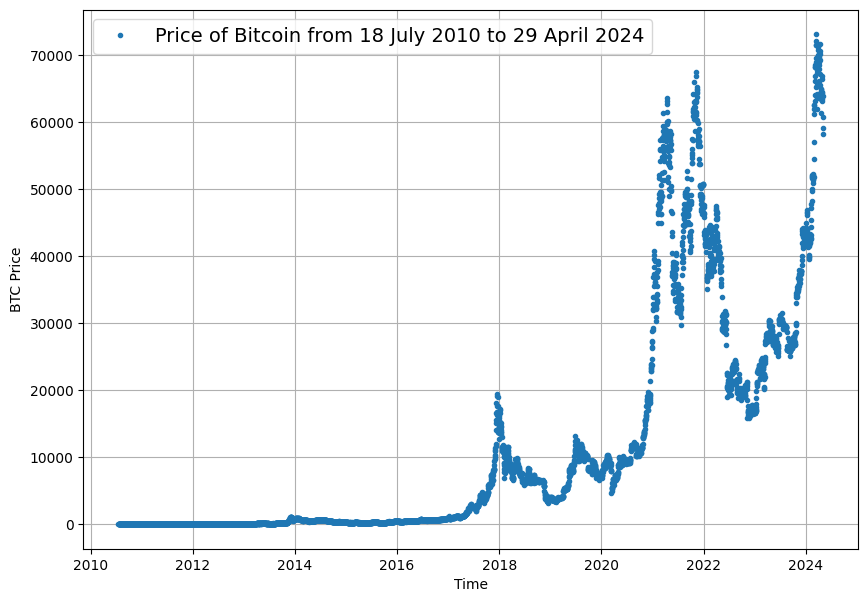

In [60]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=timesteps, values=btc_price, label="Price of Bitcoin from 18 July 2010 to 29 April 2024")

In [61]:
# We create test train split at any abitrary point in time to split 
# our data so that test split simulates the future data and train split the past historical data

split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(4031, 1008, 4031, 1008)

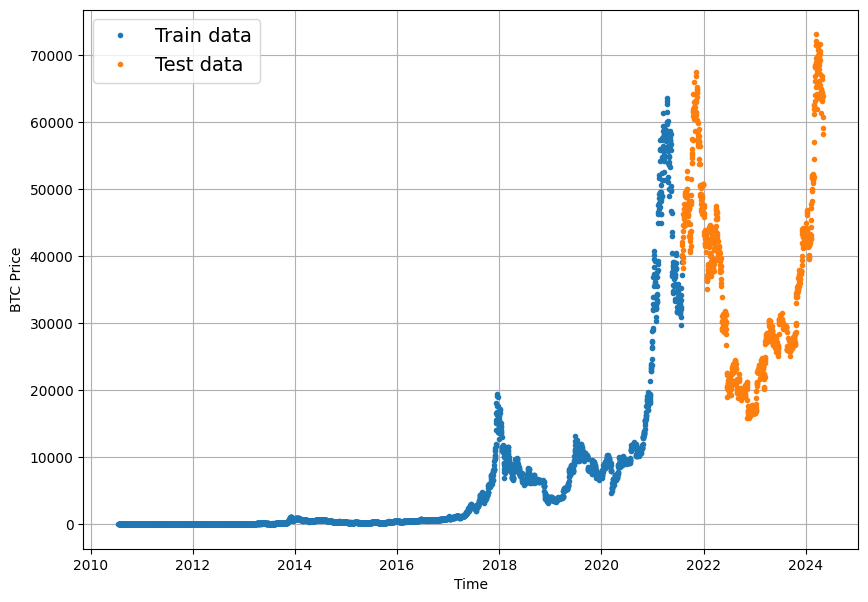

In [62]:
# Verify if train test split is correct
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [63]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([42094.78   , 41700.99674, 40120.70072, 39153.01029, 38255.05   ,
        39772.4717 , 40849.95098, 42792.7879 , 44665.77153, 43780.2388 ]),
 array([66818.89, 66386.61, 64291.07, 64495.27, 63806.23, 63483.13,
        63059.25, 63817.97, 60761.95, 58266.04]))

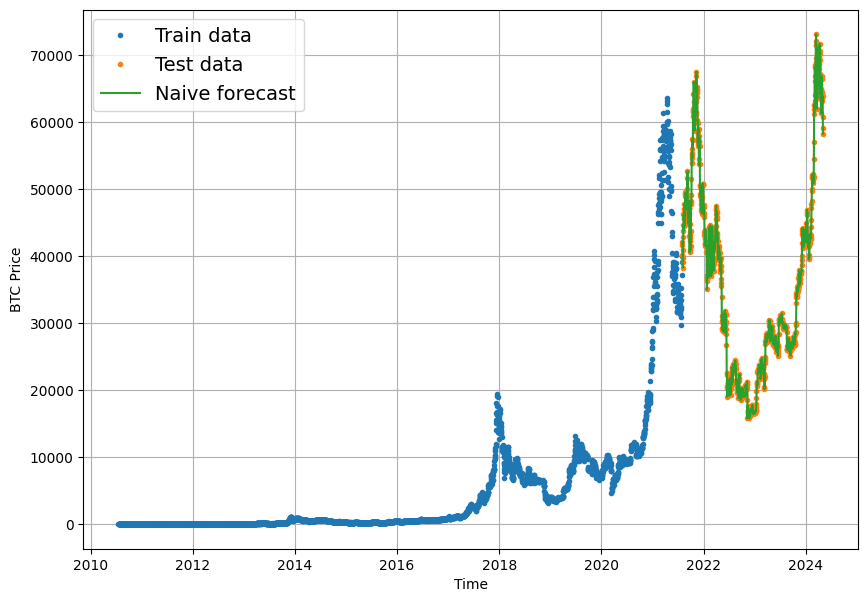

In [64]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [18]:
#creating metrics function to print multiple metrics at once
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  
  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "mape": mape.numpy()}

In [19]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 763.1911, 'mse': 1424364.4, 'mape': 2.0594168}

In [20]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

35526.63615118056

In [21]:
#So while mean is 35526$, and average prediciton is off by 763$ we can say the prediction is good enough

In [22]:
#We will do window formating to convert the dataset into that of supervised leaerning by using WINDOW_SIZE as the features
#ie no of day's values used to predict the horizon ie the label
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [24]:
bitcoin_prices.head()

,Price
Date,
2010-07-18,0.0500
2010-07-19,0.0858
2010-07-20,0.0808
2010-07-21,0.0747
2010-07-22,0.0792


In [25]:
# Add windowed columns
bitcoin_prices_ensemble = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_ensemble[f"Price+{i+1}"] = bitcoin_prices_ensemble["Price"].shift(periods=i+1)
bitcoin_prices_ensemble.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2010-07-25,0.0545,0.0626,0.0505,0.0792,0.0747,0.0808,0.0858,0.0500
2010-07-26,0.0505,0.0545,0.0626,0.0505,0.0792,0.0747,0.0808,0.0858
2010-07-27,0.0560,0.0505,0.0545,0.0626,0.0505,0.0792,0.0747,0.0808
2010-07-28,0.0600,0.0560,0.0505,0.0545,0.0626,0.0505,0.0792,0.0747
2010-07-29,0.0589,0.0600,0.0560,0.0505,0.0545,0.0626,0.0505,0.0792


In [72]:
# Make features and labels
X = bitcoin_prices_ensemble.dropna().drop("Price", axis=1)
y = bitcoin_prices_ensemble.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)


(4025, 4025, 1007, 1007)

In [27]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [28]:
from tensorflow.keras import layers

def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
 
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [29]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 120: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 862: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 962: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 460: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 560: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 350: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 453: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 553: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 112: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 572:

In [30]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [31]:
test_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [32]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 44ms/step


<tf.Tensor: shape=(15, 1007), dtype=float32, numpy=
array([[42312.805, 42028.816, 40315.055, ..., 63756.42 , 61031.727,
        57883.93 ],
       [42228.547, 42348.2  , 40529.82 , ..., 63782.254, 61402.01 ,
        59086.074],
       [42349.17 , 41850.664, 40202.336, ..., 63682.516, 60677.71 ,
        58131.062],
       ...,
       [42277.91 , 42073.71 , 40370.3  , ..., 63715.02 , 61244.195,
        58273.203],
       [42415.22 , 41843.195, 40627.207, ..., 63633.164, 60489.51 ,
        58208.23 ],
       [42340.45 , 41812.125, 40106.285, ..., 63731.906, 60645.664,
        57868.72 ]], dtype=float32)>

In [33]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 763.72, 'mse': 1414838.6, 'mape': 2.0690155}

In [34]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

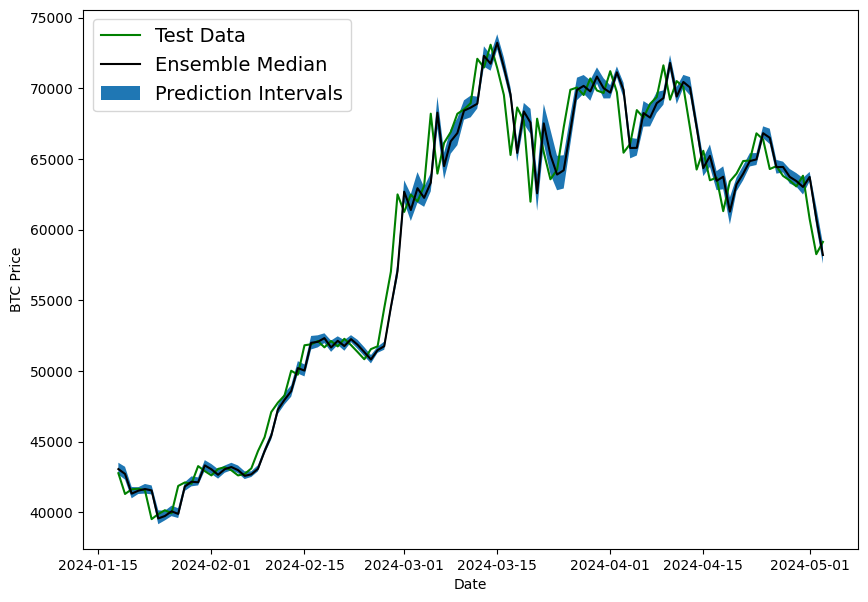

In [50]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=900
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [51]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "ensemble": ensemble_results
                              }).T
model_results.head(10)

,mae,mse,mape
naive_model,763.191101,1424364.375,2.059417
ensemble,763.719971,1414838.625,2.069016


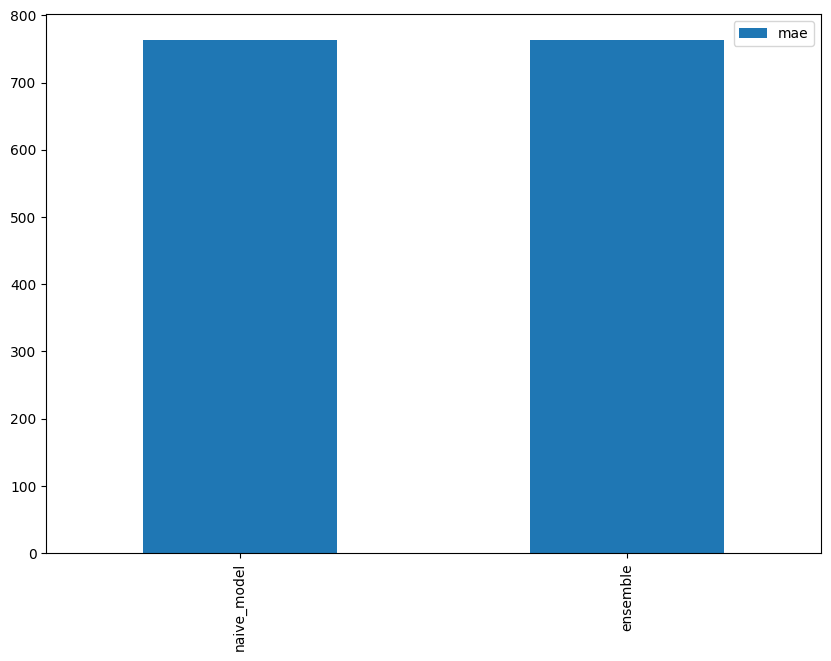

In [52]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");